<a href="https://colab.research.google.com/github/anezovic1/bike-share-prediction/blob/main/drugi_projektni_zadatak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mašinsko učenje 2023/24

## Projektni zadatak

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Zadatak 1

## Zadatak 1a

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MU Projekat/Drugi dio/dataset/hour.csv')

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data.shape

(17379, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Zadatak 1b


Problem koji ćemo postaviti za naš dataset je ta koliko zavisi korištenje usluge dijeljenja bicikala od vremenskih prilika tog dana. Hipoteza je ta da je usluga veća ako je vrijeme (temperatura, humidity, windspeed) bolje.

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

<ipython-input-18-b873376f38be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


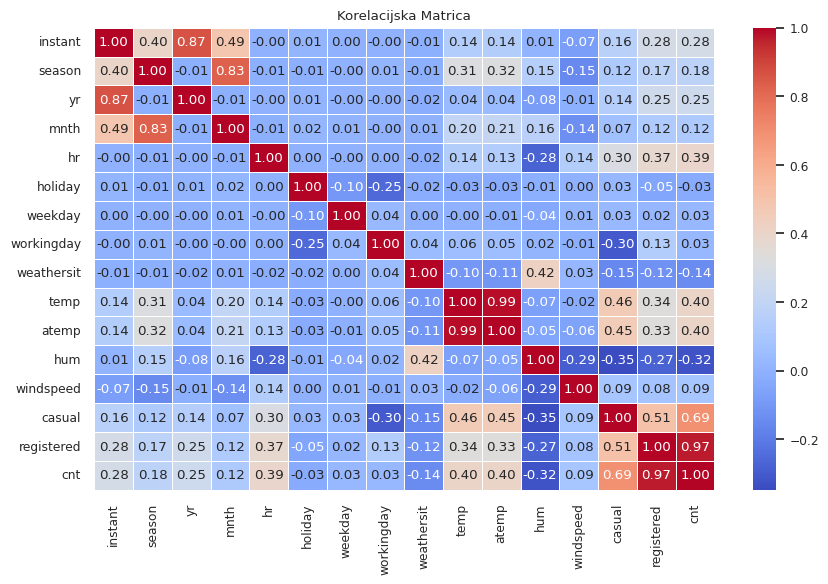

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 6))
sns.set(font_scale=0.8)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelacijska Matrica')
plt.show()

##Zadatak 1c

### Tipovi i distribucija atributa

Većina atributa je numeričkog tipa, osim kolone **dteday** koja je tipa object.

In [ ]:
int_tip = ['int64']
data_int= data.select_dtypes(include=int_tip)
print('Broj kolona tipa int64 je: ', len(data_int.dtypes))

Broj kolona tipa int64 je:  12


In [ ]:
float_tip = ['float64']
data_float = data.select_dtypes(include=float_tip)
print('Broj kolona tipa float64 je: ', len(data_float.dtypes))

Broj kolona tipa float64 je:  4


Ukupan broj iznajmljenih bicikala tokom godišnjih doba

<ipython-input-7-a9bb5ea374d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='season', y='cnt', data=data, estimator=sum, errorbar=None, palette='coolwarm')
<ipython-input-7-a9bb5ea374d9>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(['spring', 'summer', 'fall', 'winter'])


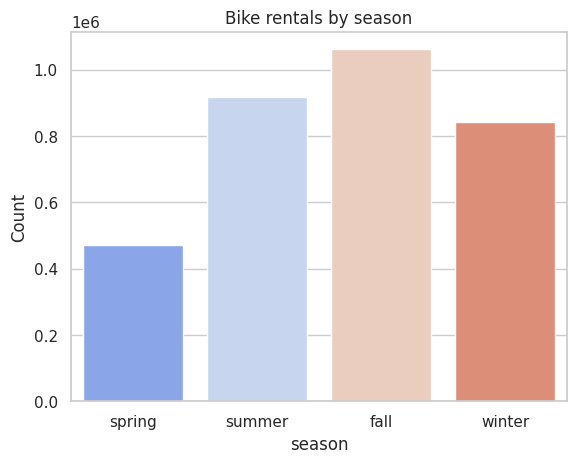

In [ ]:
sns.set(style="whitegrid")
plot = sns.barplot(x='season', y='cnt', data=data, estimator=sum, errorbar=None, palette='coolwarm')
plot.set(title="Bike rentals by season", xlabel="season", ylabel="Count")
plot.set_xticklabels(['spring', 'summer', 'fall', 'winter'])
plt.show()

Ukupan broj iznajmljenih bicikala tokom svakog sata

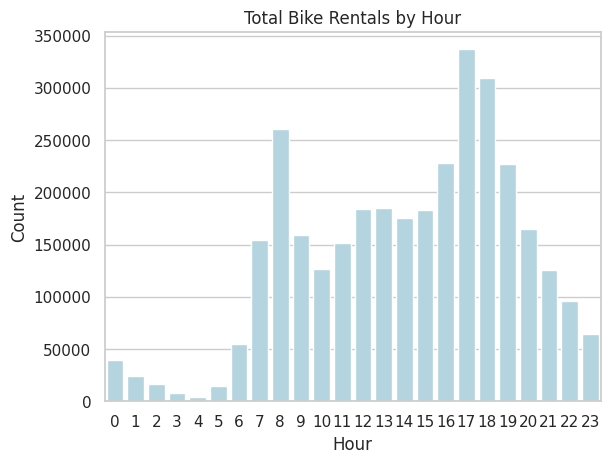

In [ ]:
plot = sns.barplot(x='hr', y='cnt', data=data.groupby('hr')['cnt'].sum().reset_index(), color='lightblue')
plot.set(title="Total Bike Rentals by Hour", xlabel="Hour", ylabel="Count")
plt.show()

Distribucija temperature

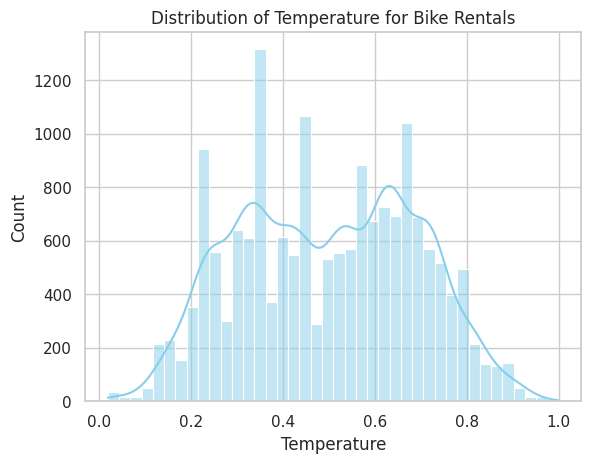

In [ ]:
plot = sns.histplot(data['temp'], kde=True, color='skyblue')
plot.set(title="Distribution of Temperature for Bike Rentals", xlabel="Temperature", ylabel="Count")
plt.show()

Distribucija vlažnosti

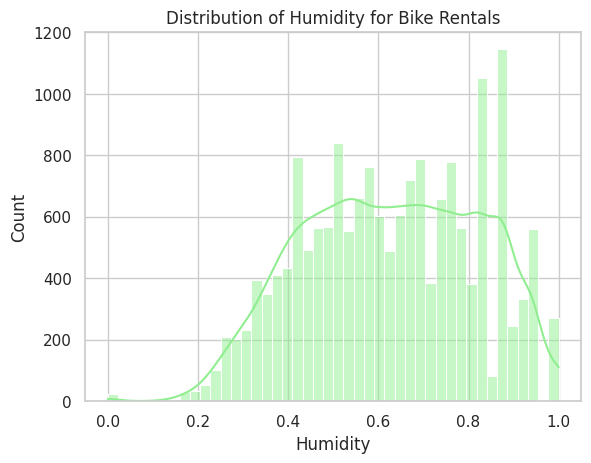

In [ ]:
plot = sns.histplot(data['hum'], kde=True, color='lightgreen')
plot.set(title="Distribution of Humidity for Bike Rentals", xlabel="Humidity", ylabel="Count")
plt.show()

Distribucija brzine vjetra

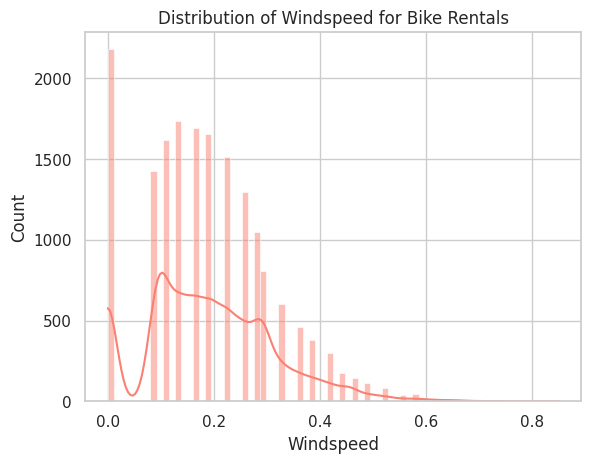

In [ ]:
plot = sns.histplot(data['windspeed'], kde=True, color='salmon')
plot.set(title="Distribution of Windspeed for Bike Rentals", xlabel="Windspeed", ylabel="Count")
plt.show()

### Ispunjavanje nepostojećih i uklanjanje nepodobnih vrijednosti

Median vrijednosti za zamjenu

In [ ]:
median_instant = data['instant'].median()
median_dteday = pd.to_datetime(data['dteday'], errors='coerce').median()
median_season = data['season'].median()
median_yr = data['yr'].median()
median_mnth = data['mnth'].median()
median_hr = data['hr'].median()
median_holiday = data['holiday'].median()
median_weekday = data['weekday'].median()
median_workingday = data['workingday'].median()
median_weathersit = data['weathersit'].median()
median_temp = data['temp'].median()
median_atemp = data['atemp'].median()
median_hum = data['hum'].median()
median_windspeed = data['windspeed'].median()
median_casual = data['casual'].median()
median_registered = data['registered'].median()
median_cnt = data['cnt'].median()


U sljedećem dijelu koda provjerićemo da li postoje nepostojeće vrijednosti u našem datasetu, ako postoje popunićemo ih srednjom vrijednošću te kolone. Nakon toga provjeravamo da li su kolone u ispravnom rangu vrijednosti, što se također pokazuje tačno. Ukoliko bi imali neisprvaan rang, te vrijednosti bi zamijenili median vrijednosti.

In [ ]:
print("\nNedostajuće vrijednosti u svakoj koloni:")
print(data.isnull().sum())

#Primjer kako bi srednjom vrijednošću popunili nedostajuće vrijednosti da postoje

data['temp'].fillna(data['temp'].mean(), inplace=True)

# Primmjer kojim provjeravamo da li ima nepodobnih vrijednosti i ukoliko postoje mijenjamo ih srednjom vrijednošću
for index, row in data.iterrows():
    if not (0 <= row['instant']):
        print(f"Zapis na indeksu {index} - 'instant' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'instant'] = median_instant

    if not (pd.to_datetime('2011-01-01', errors='coerce') <= pd.to_datetime(row['dteday'], errors='coerce') <= pd.to_datetime('2012-12-31', errors='coerce')):
        print(f"Zapis na indeksu {index} - 'dteday' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'dteday'] = median_dteday

    if not (1 <= row['season'] <= 4):
        print(f"Zapis na indeksu {index} - 'season' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'season'] = median_season

    if not (0 <= row['yr'] <= 1):
        print(f"Zapis na indeksu {index} - 'yr' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'yr'] = median_yr

    if not (1 <= row['mnth'] <= 12):
        print(f"Zapis na indeksu {index} - 'mnth' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'mnth'] = median_mnth

    if not (0 <= row['hr'] <= 23):
        print(f"Zapis na indeksu {index} - 'hr' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'hr'] = median_hr

    if not (0 <= row['holiday'] <= 1):
        print(f"Zapis na indeksu {index} - 'holiday' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'holiday'] = median_holiday

    if not (0 <= row['weekday'] <= 6):
        print(f"Zapis na indeksu {index} - 'weekday' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'weekday'] = median_weekday

    if not (0 <= row['workingday'] <= 1):
        print(f"Zapis na indeksu {index} - 'workingday' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'workingday'] = median_workingday

    if not (1 <= row['weathersit'] <= 4):
        print(f"Zapis na indeksu {index} - 'weathersit' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'weathersit'] = median_weathersit

    if not (-8 <= row['temp'] <= 39):
        print(f"Zapis na indeksu {index} - 'temp' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'temp'] = median_temp

    if not (-16 <= row['atemp'] <= 50):
        print(f"Zapis na indeksu {index} - 'atemp' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'atemp'] = median_atemp

    if not (0 <= row['hum'] <= 100):
        print(f"Zapis na indeksu {index} - 'hum' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'hum'] = median_hum

    if not (0 <= row['windspeed'] <= 67):
        print(f"Zapis na indeksu {index} - 'windspeed' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'windspeed'] = median_windspeed

    if not (row['casual'] >= 0):
        print(f"Zapis na indeksu {index} - 'casual' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'casual'] = median_casual

    if not (row['registered'] >= 0):
        print(f"Zapis na indeksu {index} - 'registered' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'registered'] = median_registered

    if not (row['cnt'] >= 0):
        print(f"Zapis na indeksu {index} - 'cnt' ne zadovoljava kriterij. Zamjena vrijednosti.")
        data.loc[index, 'cnt'] = median_cnt


#Provjera outliera u numeričkim kolonama
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

print("\nOutlieri u numeričkim kolonama:")
for col in numerical_columns:
    q1 = data[col].quantile(0.1)
    q3 = data[col].quantile(0.9)
    iqr = q3 - q1
    outliers = data[(data[col] < q1 - 1.5 * iqr) | (data[col] > q3 + 1.5 * iqr)]
    print(f"{col}: {len(outliers)} outliers")

    # Ukoliko su pronađene validne outlier vrijednosti treba definisati lower i upper vrijednosti te sve outliere zamijeniti sa njima
    data[col] = data[col].clip(lower=data[col].quantile(0.01), upper=data[col].quantile(0.99))





Nedostajuće vrijednosti u svakoj koloni:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Outlieri u numeričkim kolonama:
temp: 0 outliers
atemp: 0 outliers
hum: 0 outliers
windspeed: 0 outliers
casual: 231 outliers
registered: 4 outliers
cnt: 0 outliers


Nepodobne vrijednosti kao što je vidljivo iz prethonog ispisa ne postoje osim u casual koloni. Ova kolona predstavlja koliko je neprijavljenih odnosno casual dijeljena bicikala te su ove vrijednosti u ovom slučaju u redu.

###Transformacija, skaliranje atributa

Sve kolone jedinstvene po tipu

Nema ekstremnih ni nedostajućih vrijednosti (već provjereno)

Nijedan atribut nije potrebno dodatno transformisati

Neki atributi su već normalizovani, poput temperature (temp), temperature po osjećaju (atemp), vlažnosti (hum) i brzine vjetra (windspeed)

---

Imamo kolonu za godinu i mjesec, izvodimo kolonu za dan koristeći dteday

In [ ]:
from datetime import datetime

data["day"] = pd.to_datetime(data['dteday']).dt.day
data["day"]

0         1
1         1
2         1
3         1
4         1
         ..
17374    31
17375    31
17376    31
17377    31
17378    31
Name: day, Length: 17379, dtype: int64

Kolona dteday nam potencijalno više i ne treba

In [ ]:
del data["dteday"]

Kolona holiday se potencijalno može izostaviti obzirom da informacije o tome koji je dan u sedmici u pitanju, kao i to da li je radni dan ili vikend ili praznik možemo dobiti iz kolona weekday i workingday

In [ ]:
del data["holiday"]

Kolona cnt bi se također mogla izbaciti obzirom da ne nosi nikakvu novu informaciju (dobijena kombinacijom casual i registered)

In [ ]:
del data["cnt"]

Za kraj, kolona instant je redundantna

In [ ]:
del data["instant"]

Skaliranje

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
def standard_scale_column(data, key):
  column_to_scale = data[key]

  # Reshape the column to a 2D array (required by StandardScaler)
  column_to_scale_2d = column_to_scale.values.reshape(-1, 1)

  # Create a StandardScaler instance and fit_transform on the column
  scaler = StandardScaler()
  scaled_column = scaler.fit_transform(column_to_scale_2d)

  # Replace the original column with the scaled values
  data[key] = scaled_column
  return data

In [ ]:
def min_max_scale_column(data, key):
  column_to_scale = data[key]

  # Reshape the column to a 2D array (required by StandardScaler)
  column_to_scale_2d = column_to_scale.values.reshape(-1, 1)

  # Create a StandardScaler instance and fit_transform on the column
  scaler = MinMaxScaler()
  scaled_column = scaler.fit_transform(column_to_scale_2d)

  # Replace the original column with the scaled values
  data[key] = scaled_column
  return data

Skalirane su one kolone koje inicijalno nisu bile. Korišten je min-max skaliranje obzirom da je isti princip inicijalno korišten nad nekim kolonama.

In [ ]:
data_not_scaled = data

In [ ]:
data = min_max_scale_column(data, "mnth")
data = min_max_scale_column(data, "hr")
data = min_max_scale_column(data, "day")
data = min_max_scale_column(data, "weekday")
data = min_max_scale_column(data, "weathersit")
data = min_max_scale_column(data, "casual")
data = min_max_scale_column(data, "registered")

In [ ]:
# data = standard_scale_column(data, "mnth")
# data = standard_scale_column(data, "hr")
# data = standard_scale_column(data, "day")
# data = standard_scale_column(data, "weekday")
# data = standard_scale_column(data, "weathersit")
# data = standard_scale_column(data, "casual")
# data = standard_scale_column(data, "registered")

In [ ]:
data

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
0,1,0,0.0,0.000000,1.000000,0,0.000000,0.24,0.2879,0.81,0.0000,0.012500,0.017187,0.0
1,1,0,0.0,0.043478,1.000000,0,0.000000,0.22,0.2727,0.80,0.0000,0.033333,0.044399,0.0
2,1,0,0.0,0.086957,1.000000,0,0.000000,0.22,0.2727,0.80,0.0000,0.020833,0.037238,0.0
3,1,0,0.0,0.130435,1.000000,0,0.000000,0.24,0.2879,0.75,0.0000,0.012500,0.012890,0.0
4,1,0,0.0,0.173913,1.000000,0,0.000000,0.24,0.2879,0.75,0.0000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,1.0,0.826087,0.166667,1,0.333333,0.26,0.2576,0.60,0.1642,0.045833,0.153247,1.0
17375,1,1,1.0,0.869565,0.166667,1,0.333333,0.26,0.2576,0.60,0.1642,0.033333,0.114577,1.0
17376,1,1,1.0,0.913043,0.166667,1,0.000000,0.26,0.2576,0.60,0.1642,0.029167,0.117441,1.0
17377,1,1,1.0,0.956522,0.166667,1,0.000000,0.26,0.2727,0.56,0.1343,0.054167,0.067314,1.0


### Klastering tendencija

In [ ]:
from typing import Union

import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree


def hopkins(data_frame: Union[np.ndarray, pd.DataFrame], sampling_size: int) -> float:
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.

    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    data_frame_sample = sample_observation_from_dataset(data_frame, sampling_size)

    sample_distances_to_nearest_neighbours = get_distance_sample_to_nearest_neighbours(
        data_frame, data_frame_sample
    )

    uniformly_selected_observations_df = simulate_df_with_same_variation(
        data_frame, sampling_size
    )

    df_distances_to_nearest_neighbours = get_nearest_sample(
        data_frame, uniformly_selected_observations_df
    )

    x = sum(sample_distances_to_nearest_neighbours)
    y = sum(df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception("The denominator of the hopkins statistics is null")

    return x / (x + y)[0]


def get_nearest_sample(df: pd.DataFrame, uniformly_selected_observations: pd.DataFrame):
    tree = BallTree(df, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    return uniformly_df_distances_to_nearest_neighbours


def simulate_df_with_same_variation(
    df: pd.DataFrame, sampling_size: int
) -> pd.DataFrame:
    max_data_frame = df.max()
    min_data_frame = df.min()
    uniformly_selected_values_0 = np.random.uniform(
        min_data_frame[0], max_data_frame[0], sampling_size
    )
    uniformly_selected_values_1 = np.random.uniform(
        min_data_frame[1], max_data_frame[1], sampling_size
    )
    uniformly_selected_observations = np.column_stack(
        (uniformly_selected_values_0, uniformly_selected_values_1)
    )
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(
                min_data_frame[i], max_data_frame[i], sampling_size
            )
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    return uniformly_selected_observations_df


def get_distance_sample_to_nearest_neighbours(df: pd.DataFrame, data_frame_sample):
    tree = BallTree(df, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    return data_frame_sample_distances_to_nearest_neighbours


def sample_observation_from_dataset(df, sampling_size: int):
    if sampling_size > df.shape[0]:
        raise Exception("The number of sample of sample is bigger than the shape of D")
    data_frame_sample = df.sample(n=sampling_size)
    return data_frame_sample

In [ ]:
hopkins_score = hopkins(data, 1000)
print(f"Hopkins Statistic: {hopkins_score}")


Hopkins Statistic: 0.12532404641526917


In [ ]:
data.max()

season        4.0000
yr            1.0000
mnth          1.0000
hr            1.0000
weekday       1.0000
workingday    1.0000
weathersit    1.0000
temp          0.8844
atemp         0.8182
hum           1.0000
windspeed     0.5224
casual        1.0000
registered    1.0000
day           1.0000
dtype: float64

In [ ]:
data.min()

season        1.0000
yr            0.0000
mnth          0.0000
hr            0.0000
weekday       0.0000
workingday    0.0000
weathersit    0.0000
temp          0.1200
atemp         0.1212
hum           0.2300
windspeed     0.0000
casual        0.0000
registered    0.0000
day           0.0000
dtype: float64

In [ ]:
data.std()

season        1.106918
yr            0.500008
mnth          0.312616
hr            0.300626
weekday       0.334295
workingday    0.465431
weathersit    0.213119
temp          0.191184
atemp         0.170373
hum           0.191551
windspeed     0.119989
casual        0.197980
registered    0.213535
day           0.292979
dtype: float64

In [ ]:
print(data.isna().sum())

season        0
yr            0
mnth          0
hr            0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
day           0
dtype: int64


In [ ]:
CovMatrix=pd.DataFrame.cov(data)
CovMatrix

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,day
season,1.225268,-0.005946,0.287347,-0.002036,-0.000864,0.007080,-0.003426,0.065893,0.060154,0.031513,-0.019696,0.027171,0.041109,-0.000990
yr,-0.005946,0.250008,-0.001637,-0.000581,-0.000750,-0.000511,-0.002041,0.003838,0.003362,-0.008230,-0.000532,0.013926,0.027085,0.000301
mnth,0.287347,-0.001637,0.097729,-0.000542,0.001087,-0.000506,0.000360,0.011974,0.011028,0.009751,-0.005048,0.004395,0.008132,0.000726
hr,-0.002036,-0.000581,-0.000542,0.090376,-0.000352,0.000320,-0.001294,0.007862,0.006815,-0.015995,0.004970,0.018417,0.024225,0.000135
weekday,-0.000864,-0.000750,0.001087,-0.000352,0.111753,0.005594,0.000236,-0.000166,-0.000575,-0.002306,0.000446,0.001830,0.001598,0.000210
workingday,0.007080,-0.000511,-0.000506,0.000320,0.005594,0.216626,0.004431,0.004922,0.004272,0.001454,-0.000604,-0.027733,0.013291,0.001176
weathersit,-0.003426,-0.002041,0.000360,-0.001294,0.000236,0.004431,0.045420,-0.004202,-0.003844,0.017300,0.000638,-0.006532,-0.005523,-0.000242
temp,0.065893,0.003838,0.011974,0.007862,-0.000166,0.004922,-0.004202,0.036551,0.032180,-0.002587,-0.000507,0.017867,0.013777,0.001528
atemp,0.060154,0.003362,0.011028,0.006815,-0.000575,0.004272,-0.003844,0.032180,0.029027,-0.001729,-0.001244,0.015751,0.012196,0.001019
hum,0.031513,-0.008230,0.009751,-0.015995,-0.002306,0.001454,0.017300,-0.002587,-0.001729,0.036692,-0.006679,-0.013445,-0.011406,0.001396


In [ ]:
CorrMatrix = pd.DataFrame.corr(data)

<Axes: >

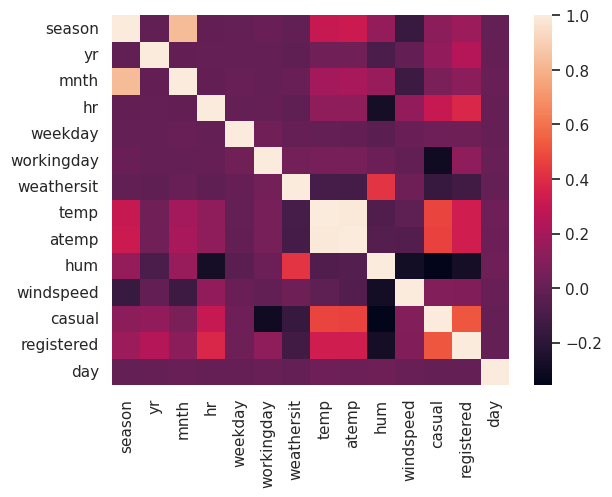

In [ ]:
sns.heatmap(CorrMatrix)

array([[<Axes: xlabel='season', ylabel='season'>,
        <Axes: xlabel='yr', ylabel='season'>,
        <Axes: xlabel='mnth', ylabel='season'>,
        <Axes: xlabel='hr', ylabel='season'>,
        <Axes: xlabel='weekday', ylabel='season'>,
        <Axes: xlabel='workingday', ylabel='season'>,
        <Axes: xlabel='weathersit', ylabel='season'>,
        <Axes: xlabel='temp', ylabel='season'>,
        <Axes: xlabel='atemp', ylabel='season'>,
        <Axes: xlabel='hum', ylabel='season'>,
        <Axes: xlabel='windspeed', ylabel='season'>,
        <Axes: xlabel='casual', ylabel='season'>,
        <Axes: xlabel='registered', ylabel='season'>,
        <Axes: xlabel='day', ylabel='season'>],
       [<Axes: xlabel='season', ylabel='yr'>,
        <Axes: xlabel='yr', ylabel='yr'>,
        <Axes: xlabel='mnth', ylabel='yr'>,
        <Axes: xlabel='hr', ylabel='yr'>,
        <Axes: xlabel='weekday', ylabel='yr'>,
        <Axes: xlabel='workingday', ylabel='yr'>,
        <Axes: xlabel='weathers

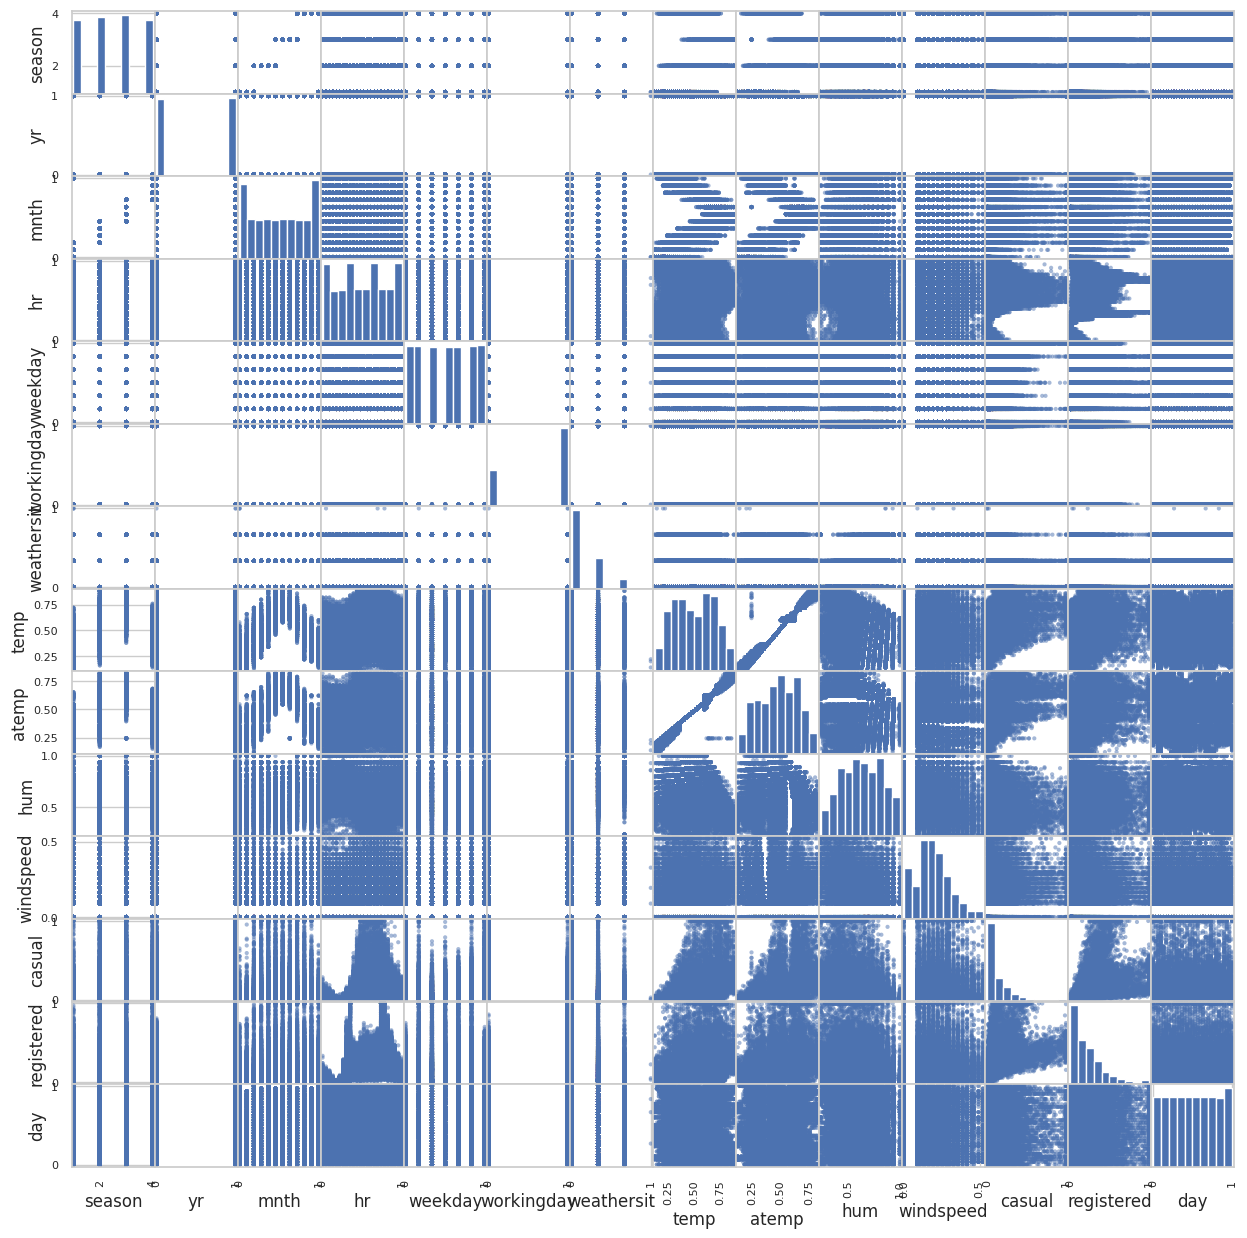

In [ ]:
# prikaz scatter matrice za sve karakteristike
from pandas.plotting import scatter_matrix

scatter_matrix(data,figsize=(15,15))


## Zadatak 1d

In [ ]:
!python -m pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

     \ 740.3 kB 11.1 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0.dev0-cp310-cp310-linux_x86_64.whl size=1974087 sha256=f83e8584543b11164a4de7a64104476612fec763154867f0f6349b5568a0a5b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-yq8t3u0v/wheels/af/c8/e0/4337b9076bf33d4114ac7db3b47f22b910adfb5526174fa630
Successfully built scikit-learn-extra


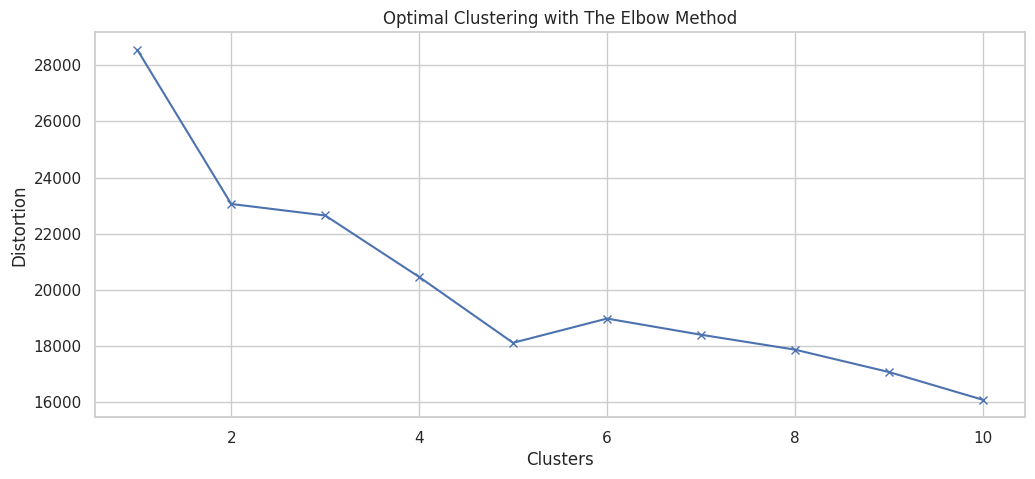

In [ ]:
#Određivanje optimalnog broja klastera pomoću Elbowe metode i računanja sume kvadratne greške (distortion)
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
distortions = []
K = range(1,11)
for k in K:
    pamModel = KMedoids(n_clusters=k)
    pamModel.fit(data)
    distortions.append(pamModel.inertia_)
plt.figure(figsize=(12,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.title('Optimal Clustering with The Elbow Method')
plt.show()

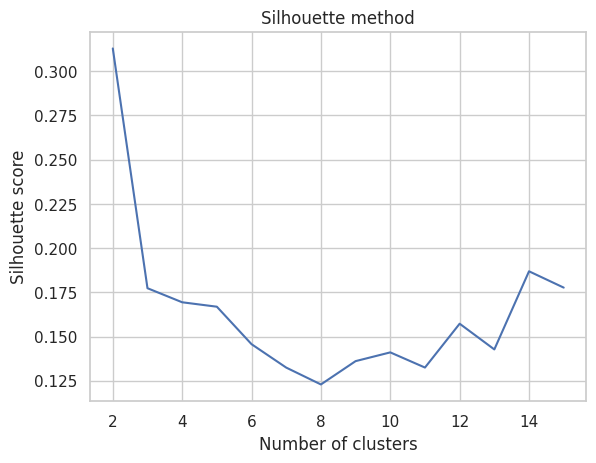

In [ ]:
#Određivanje optimalnog broja klastera pomoću Silhoutte
from sklearn.metrics import silhouette_score
sil = []
Kmax = 15
for k in range(2,Kmax+1):
  pamModel = KMedoids(n_clusters = k).fit(data)
  labels = pamModel.labels_
  sil.append(silhouette_score(data, labels, metric='euclidean'))
plt.plot(range(2, Kmax+1),sil)
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show(k)


Prema prethodnim statistikama dobijamo rezultate da je najbolje uzeti 2, a onda 4 klastera.

In [ ]:
#Izgradnja modela sa k-means za 2 klastera i random odabranim centrima
import numpy as np
np.random.seed(42)
pamModel=KMedoids(n_clusters=2,init='random')
y=pamModel.fit(data)
y

KMedoids(init='random', n_clusters=2)

In [ ]:
#pripadnost instance-uzorka klasteru
y.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#broj iteracija izvršavanja
y.n_iter_

3

In [ ]:
#uvid u centroide klastera
centroids=y.cluster_centers_
centroids

array([[3.        , 0.        , 0.72727273, 0.43478261, 0.5       ,
        1.        , 0.        , 0.7       , 0.6515    , 0.7       ,
        0.1343    , 0.07356948, 0.12979684, 0.43333333],
       [1.        , 1.        , 0.09090909, 0.47826087, 0.5       ,
        1.        , 0.        , 0.36      , 0.3333    , 0.53      ,
        0.2836    , 0.03542234, 0.14108352, 0.46666667]])

In [ ]:
# Broj instanci po klasterima
count=np.bincount(y.labels_)
count

array([10931,  6448])

In [ ]:
# Procjena klastering strukture pomoću Silhoutte scora
from sklearn.metrics import silhouette_score
silhouette_score(data,labels=y.labels_)

0.3096037012507835

In [ ]:
#Izgradnja modela sa k-means za 4 klastera i random odabranim centrima
import numpy as np
np.random.seed(42)
pamModel=KMedoids(n_clusters=4,init='random')
y=pamModel.fit(data)
y

KMedoids(init='random', n_clusters=4)

In [ ]:
#pripadnost instance-uzorka klasteru
y.labels_

array([1, 1, 1, ..., 3, 3, 3])

In [ ]:
#broj iteracija izvršavanja
y.n_iter_

2

In [ ]:
#uvid u centroide klastera
centroids=y.cluster_centers_
centroids

array([[3.        , 1.        , 0.54545455, 0.39130435, 1.        ,
        0.        , 0.        , 0.66      , 0.6212    , 0.74      ,
        0.194     , 0.22343324, 0.22573363, 0.43333333],
       [1.        , 0.        , 0.09090909, 0.39130435, 0.5       ,
        1.        , 0.        , 0.24      , 0.2121    , 0.52      ,
        0.2836    , 0.00544959, 0.13769752, 0.5       ],
       [4.        , 0.        , 0.90909091, 0.47826087, 0.33333333,
        1.        , 0.33333333, 0.56      , 0.5303    , 0.64      ,
        0.194     , 0.04904632, 0.13092551, 0.46666667],
       [2.        , 1.        , 0.36363636, 0.52173913, 0.33333333,
        1.        , 0.        , 0.64      , 0.6061    , 0.73      ,
        0.194     , 0.11989101, 0.248307  , 0.46666667]])

In [ ]:
# Broj instanci po klasterima
count=np.bincount(y.labels_)
count

array([2960, 4273, 5370, 4776])

In [ ]:
# Procjena klastering strukture pomoću Silhoutte scora
from sklearn.metrics import silhouette_score
silhouette_score(data,labels=y.labels_)

0.17635509917866138

## Zadatak 1e

Sljedeće dvije metode koriste se s ciljem određivanja optimalnog broja klastera.

### Elbow metoda

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

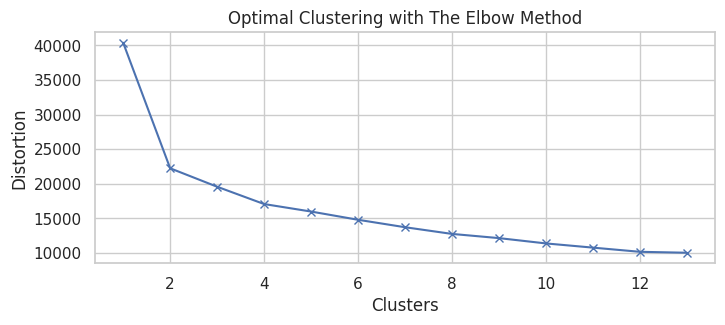

In [ ]:
from sklearn.cluster import KMeans

data_x = data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]].values

distortions = []
K = range(1,14)

for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel.fit(data_x)
    distortions.append(kmeansModel.inertia_)

plt.figure(figsize=(8,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.title('Optimal Clustering with The Elbow Method')
plt.show()

### Silhoutte metoda

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

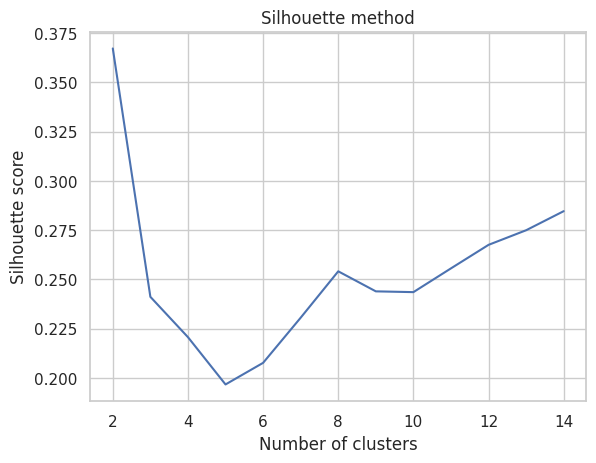

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
Kmax = 14

for k in range(2, Kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(data)
    labels = kmeans.labels_
    sil.append(silhouette_score(data_x, labels, metric = 'euclidean'))

plt.plot(range(2, Kmax + 1), sil)
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show(k)

Na osnovu ove dvije metode, bit će uzeto **k = 2**.

Treba napomenuti da je moguće pokušati izgraditi model i sa k = 4. Ako bismo željeli veći broj klastera, trebali bismo izbaciti neke atribute i smanjiti dimenzionalnost skupa podataka, što će biti i urađeno kada se bude koristila PCA analiza.



### Izgradnja modela

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
y = kmeans2.fit(data_x)
print(y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)


In [ ]:
print(y.labels_)
print(y.n_iter_)

[1 1 1 ... 1 1 1]
2


In [ ]:
centroids = y.cluster_centers_
print(centroids)

[[3.48487626 0.49885426 0.74095909 0.50064261 0.50122212 0.68801558
  0.13302016 0.56848992 0.53882089 0.64970784 0.17088061 0.1686106
  0.25089483 0.48934846]
 [1.50965206 0.50629985 0.26379504 0.50343514 0.5        0.67737834
  0.15057989 0.42486251 0.4120176  0.60568142 0.20804719 0.12543059
  0.18481149 0.48954649]]


In [ ]:
count = np.bincount(y.labels_)
print(count)

[8728 8651]


In [ ]:
silhouette_score(data_x, labels=y.labels_)

0.3672727586955209

Dobijeni skor ukazuje na to da su klasteri relativno dobro definirani, ali postoji prostor za poboljšanje.

In [ ]:
def plot_data_and_means(data, means, clusters):
  plt.figure(figsize=(5,5))
  plt.scatter(data[:,7], data[:,11], c=clusters, s = 50, alpha=0.4, cmap='viridis')
  plt.scatter(means[:,7], means[:,11], marker = "s", s = 500, c = range(2), edgecolor="red", cmap='viridis')

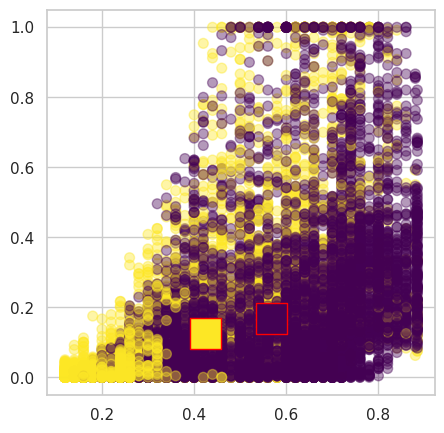

In [ ]:
plot_data_and_means(data_x,centroids,y.labels_)

## Zadatak 1f

In [ ]:
data_scaled = data_not_scaled

###Standardizacija podataka

In [ ]:
data_scaled = standard_scale_column(data_scaled, "mnth")
data_scaled = standard_scale_column(data_scaled, "hr")
data_scaled = standard_scale_column(data_scaled, "day")
data_scaled = standard_scale_column(data_scaled, "weekday")
data_scaled = standard_scale_column(data_scaled, "weathersit")
data_scaled = standard_scale_column(data_scaled, "casual")
data_scaled = standard_scale_column(data_scaled, "registered")

###PCA analiza

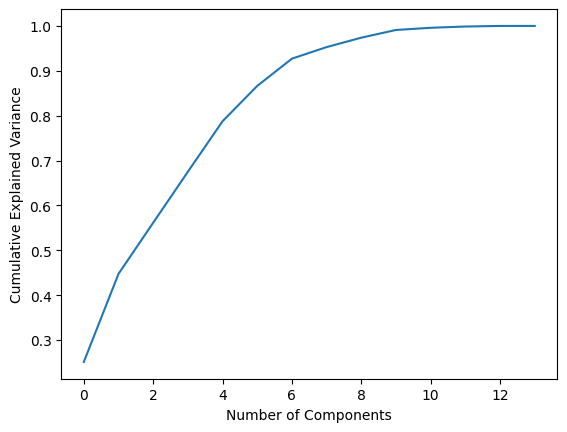

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(data_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=12)
data_pca = pca.fit_transform(data_scaled)

###Određivanje optimalnog broja klastera

In [ ]:
!pip install scikit-learn-extra

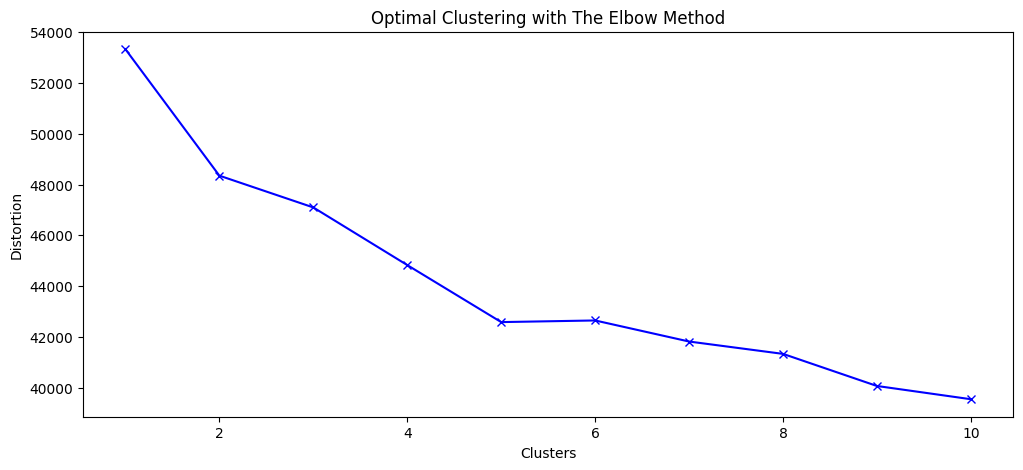

In [ ]:
# Određivanje optimalnog broja klastera pomoću Elbowe metode i računanja sume kvadratne greške (distortion)
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
distortions = []
K = range(1,11)
for k in K:
    pamModel = KMedoids(n_clusters=k)
    pamModel.fit(data_pca)
    distortions.append(pamModel.inertia_)
plt.figure(figsize=(12,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.title('Optimal Clustering with The Elbow Method')
plt.show()

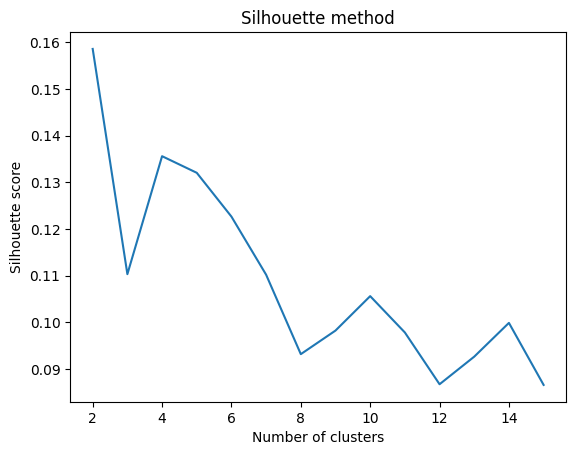

In [ ]:
# Određivanje optimalnog broja klastera pomoću Silhoutte
from sklearn.metrics import silhouette_score
sil = []
Kmax = 15
for k in range(2,Kmax+1):
  pamModel = KMedoids(n_clusters = k).fit(data_pca)
  labels = pamModel.labels_
  sil.append(silhouette_score(data_pca, labels, metric='euclidean'))
plt.plot(range(2, Kmax+1),sil)
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show(k)

Nakon PCA analize uzimamo 2 klastera, a možemo i 4.

###PAM algoritam

####2 klastera:

In [ ]:
import numpy as np
np.random.seed(42)
pamModel=KMedoids(n_clusters=2,init='random')
y=pamModel.fit(data_pca)
y

KMedoids(init='random', n_clusters=2)

In [ ]:
# Uvid u centroide klastera
centroids = y.cluster_centers_
centroids

array([[ 1.1792239 ,  0.24114892,  0.11145385, -0.56016009, -0.29324147,
        -0.08223899,  0.279251  ,  0.38717056,  0.03310455,  0.40220068,
        -0.01245062,  0.17571658,  0.00520762],
       [-0.72287431,  0.16083055, -0.35758023,  0.09200948, -0.7326383 ,
        -0.41054213,  0.14869228, -0.50700149,  0.06063746,  0.17486485,
        -0.12119459, -0.06997731, -0.07266687]])

In [ ]:
def plot_data_and_means(data, means, clusters):
    plt.figure(figsize=(5, 5))
    plt.scatter(data[:, 7], data[:, 11], c=clusters, s=50, alpha=0.4, cmap='viridis')
    plt.scatter(means[:, 7], means[:, 11], marker="s", s=500, c=range(len(means)), edgecolor="red", cmap='viridis')

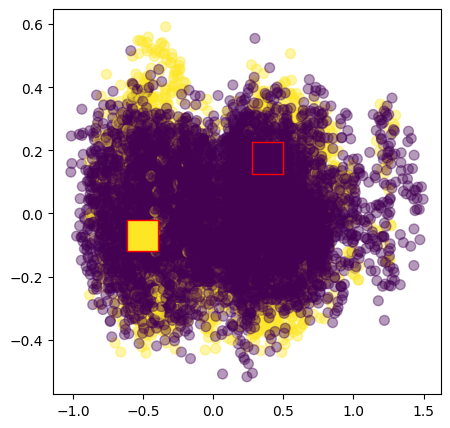

In [ ]:
plot_data_and_means(data_pca, centroids, y.labels_)

In [ ]:
# Procjena klastering strukture pomoću Silhoeutte scora
from sklearn.metrics import silhouette_score
silhouette_score(data_pca,labels=y.labels_)

0.15606099191159292

####4 klastera

In [ ]:
import numpy as np
np.random.seed(42)
pamModel=KMedoids(n_clusters=4,init='random')
y=pamModel.fit(data_pca)
y

KMedoids(init='random', n_clusters=4)

In [ ]:
# Uvid u centroide klastera
centroids = y.cluster_centers_
centroids

array([[ 1.62114675,  0.88710308,  0.18530239,  0.20023224, -0.65017558,
         0.16031547, -0.20428391,  0.34171029,  0.00239982,  0.6367618 ,
        -0.0359639 ,  0.04060992],
       [-2.14082809,  0.50755436, -0.47225927,  0.23233556, -0.90091902,
        -0.41989285,  0.0339002 , -0.43525978,  0.08610933,  0.17816236,
         0.37047029,  0.00991357],
       [ 0.07079495, -1.12333286, -0.01755125, -0.54218584, -0.72233468,
        -0.15679572,  0.28658998, -0.50899082,  0.04776213,  0.12743488,
        -0.19915914, -0.13079685],
       [ 0.26617678,  1.24821754, -0.29622283, -0.67529866,  0.0678095 ,
        -0.23412133,  0.58316811,  0.32647356,  0.06534913,  0.31248678,
        -0.36330872,  0.06287025]])

In [ ]:
def plot_data_and_means(data, means, clusters):
    plt.figure(figsize=(5, 5))
    plt.scatter(data[:, 7], data[:, 11], c=clusters, s=50, alpha=0.4, cmap='viridis')
    plt.scatter(means[:, 7], means[:, 11], marker="s", s=500, c=range(len(means)), edgecolor="red", cmap='viridis')

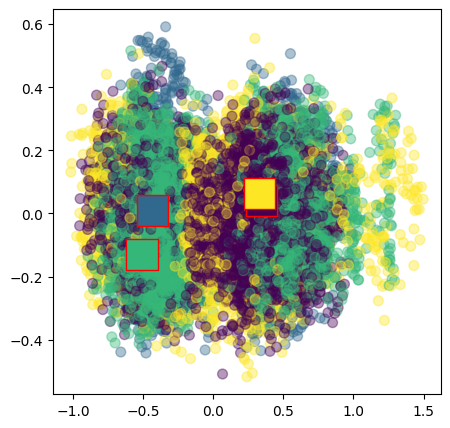

In [ ]:
plot_data_and_means(data_pca, centroids, y.labels_)

In [ ]:
# Procjena klastering strukture pomoću Silhoeutte scora
from sklearn.metrics import silhouette_score
silhouette_score(data_pca,labels=y.labels_)

0.1249656244714867

###K-means algoritam

####2 klastera

In [ ]:
!pip install pyclustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
y1 = kmeans2.fit(data_pca)
print(y1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)


In [ ]:
centroids1 = y1.cluster_centers_

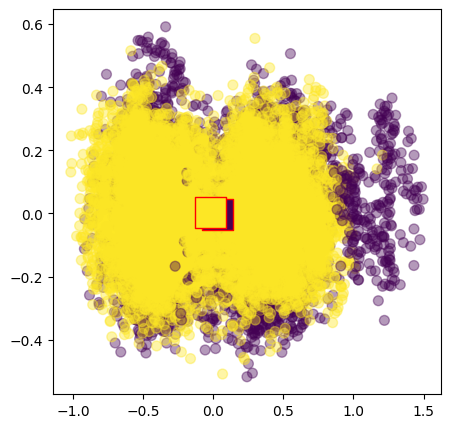

In [ ]:
plot_data_and_means(data_pca, centroids1, y1.labels_)

In [ ]:
silhouette_score(data_pca, labels = y1.labels_)

0.17590570180817366

####4 klastera

In [ ]:
kmeans2 = KMeans(n_clusters=4, random_state=42)
y1 = kmeans2.fit(data_pca)
print(y1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)


In [ ]:
centroids1 = y1.cluster_centers_

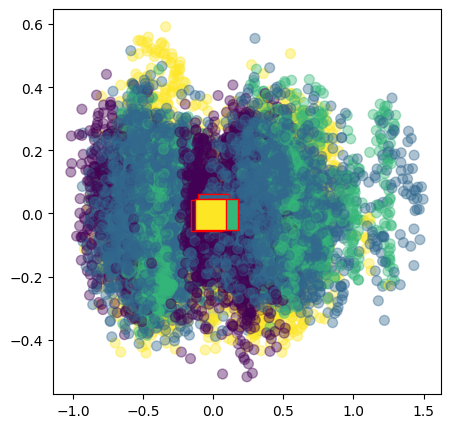

In [ ]:
plot_data_and_means(data_pca, centroids1, y1.labels_)

In [ ]:
silhouette_score(data_pca, labels = y1.labels_)

0.15370252829031517

###Diskusija

Performanse algoritama klasteringa su diskutovane na osnovu Silhouette score-a, koji mjeri koliko su instance unutar klastera slične međusobno u odnosu na to koliko su različite od instanci iz drugih klastera. Što je veći Silhouette score to je bolji klastering.

**PAM algoritam**

Prije PCA analize Silhouette score za 2 klastera je 0.3096. To ukazuje na umjereno dobar klastering, gdje su instance unutar klastera relativno slične, ali mogu biti i neka preklapanja. S 4 klastera je 0.1764. Ovo ukazuje na lošiji klastering, gdje su instance unutar klastera manje slične međusobno.

S PCA analizom za 2 klastera se Silhouette score smanjio na 0.156, a za 4 klastera score je 0.125.

**K-means algoritam**

Prije PCA analize Silhouette score za 2 klastera je 0.3673, što znači da daje dobre performanse. Klasteri su dobro definirani, a instance unutar njih su međusobno slične.

S PCA analizom za 2 klastera Silhouette score je 0.1759, a za 4 klastera je 0.1537.


**Zaključak**

Za PAM algoritam, Silhouette score je opao nakon PCA analize, što ukazuje na potencijalno smanjenje kvaliteta klasteringa. Može se pretpostaviti da PCA analiza nije doprinijela poboljšanju performansi PAM algoritma u ovom slučaju.

Za K-means algoritam, Silhouette score također opada nakon PCA analize, ali razlika nije dramatična. To može značiti da je K-means i dalje relativno dobar u održavanju kvalitete klasteringa nakon smanjenja dimenzionalnosti.

U oba slučaja, rezultati Silhouette score-a nakon PCA analize sugerišu da bi smanjenje dimenzionalnosti podataka moglo utjecati na performanse klasteringa. Ovo može biti rezultat gubitka informacija ili bitnih atributa tokom PCA analize.

# Spašavanje

In [ ]:
#data.to_csv('/content/drive/MyDrive/MU Projekat/Drugi dio/dataset/cleaned_drugizad.csv', index=False)